<a href="https://colab.research.google.com/github/msiddhesh/A_Real_Estate_price_Prediction_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####    `Real Estate Price Prediction`

- Took a dataset of Bangalore home prices from kaggle
   [Link](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data).

In [2]:
#Importing usefull libraries.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

# New Section

In [5]:
#Importing Required Dataset
data = pd.read_csv("/content/bengaluru_house_prices.csv")

In [6]:
#Data Head
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.shape

(13320, 9)

In [8]:
#Hide Warning
import warnings
warnings.filterwarnings("ignore")

- Checking What we can Drop

In [9]:
data.groupby("availability")["availability"].agg("count")

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [10]:
data.groupby("balcony")["balcony"].agg("count")

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

###### `Lets try Some Data Cleanning`

In [11]:
data.groupby("society")["society"].agg("count")

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [12]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

For making our analysis simple lets drop some column which may less effect our annalysis

In [69]:
data_1 = data.drop(["availability","area_type","balcony","society"],axis=1)

In [70]:
data_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


- Checking size column

In [71]:
data_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [72]:
data_1 = data_1.dropna(axis=0)

In [73]:
data_1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- making a fuction for extract room BHK size

In [74]:
def extract_bhk(x):
    if type(x)!= "str":
        x= str(x)
    if x.split(" ")[1]=="BHK":
        return(int(x.split(" ")[0])+2)
    elif x.split(" ")[1]=="RK":
        return(int(x.split(" ")[0])+1)
    else:
        return(int(x.split(" ")[0]))

In [75]:
#check
extract_bhk("2 BHK"),extract_bhk("16 BHK"),extract_bhk("9 BHK"),extract_bhk("43 BHK")

(4, 18, 11, 45)

In [76]:
data_1["size"] = data_1["size"].apply(lambda x :extract_bhk(x))

In [77]:
data_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,4,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,5,1440,2.0,62.00
3,Lingadheeranahalli,5,1521,3.0,95.00
4,Kothanur,4,1200,2.0,51.00


In [24]:
data_1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [78]:
data_1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [26]:
len(data_1["location"].unique())

1304

In [79]:
sorted(data_1["bath"].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 40.0]

In [30]:
data_1["bath"] =data_1["bath"].apply(lambda x: int(x))

In [32]:
sorted(data_1["bath"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 27, 40]

In [80]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [123]:
data_1 = data_1.reindex()

In [146]:
check = data_1[~data_1['total_sqft'].apply(is_float)]
check['total_sqft'].unique

<bound method Series.unique of 30       2100 - 2850
122      3067 - 8156
137      1042 - 1105
165      1145 - 1340
188      1015 - 1540
            ...     
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 190, dtype: object>

In [82]:
len(data_1["total_sqft"].unique())

2067

In [37]:
data_1["price"].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [84]:
len(data_1["price"].unique())

1955

In [139]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    if x=="34.46Sq. Meter":
        return(370.9)
    if x=="4125Perch":
        return(1361.25)
    return (float(x))

In [140]:
data_2 = data_1.copy()

In [141]:
data_2.total_sqft = data_2.total_sqft.apply(convert_sqft_to_num)

ValueError: ignored

In [136]:
data_2[~data_2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price


In [137]:
data_2.dtypes

location       object
size            int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [138]:
data_2[405:415]

,location,size,total_sqft,bath,price
409,Sultan Palaya,2,NaN,1.0,62.0
410,Kengeri,3,370.9,1.0,18.5
411,Sanne Amanikere,4,NaN,2.0,38.0
412,Kengeri,4,NaN,2.0,38.0
413,Mahalakshmi Layout,6,NaN,7.0,250.0
414,Kanakpura Road,5,NaN,3.0,64.5
415,Amco Colony,5,NaN,3.0,88.0
416,Billekahalli,4,NaN,2.0,62.0
417,Nagarbhavi,3,NaN,3.0,150.0
418,Anandapura,2,NaN,2.0,55.0


In [132]:
data_2.loc[data_2.index==410]

,location,size,total_sqft,bath,price
410,Kengeri,3,NaN,1.0,18.5


In [96]:
data_2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,4,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,5,1440.0,2.0,62.00
3,Lingadheeranahalli,5,1521.0,3.0,95.00
4,Kothanur,4,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,6,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,4,1141.0,2.0,60.00
13318,Padmanabhanagar,6,4689.0,4.0,488.00


In [45]:
data_3 = data_2.copy()

In [46]:
data_3.dtypes

location       object
size            int64
total_sqft    float64
bath            int64
price         float64
dtype: object

Lets add one column of Price Per Squrefeet to find oulier and better understanding of data


In [47]:
data_3 ["Price_Per_Sqft"] = data_3["price"] / data_3["total_sqft"]

In [48]:
data_3.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,2,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5,120.00,0.046154
2,Uttarahalli,3,1440.0,2,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3,95.00,0.062459
4,Kothanur,2,1200.0,2,51.00,0.042500


The Price is in lak so lets convert it into thousand only for the Price per sqft part

In [ ]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [52]:
data_3 ["Price_Per_Sqft"] =data_3 ["Price_Per_Sqft"]*100000

In [53]:
data_3.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,2,39.07,3.699811e+08
1,Chikka Tirupathi,4,2600.0,5,120.00,4.615385e+08
2,Uttarahalli,3,1440.0,2,62.00,4.305556e+08
3,Lingadheeranahalli,3,1521.0,3,95.00,6.245891e+08
4,Kothanur,2,1200.0,2,51.00,4.250000e+08


In [54]:
data_3.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_Per_Sqft    0
dtype: int64

In [ ]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [56]:
data_3.location = data_3.location.apply(lambda x: x.strip())
location_count = data_3['location'].value_counts(ascending=False)
location_count

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [ ]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [59]:
location_count_less_than_5 = location_count[location_count<=5]
location_count_less_than_5

Lavelle Road                 5
Maithri Layout               5
Stage-4 Bommanahalli         5
Nagashetty Halli             5
Kallumantapa                 5
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: location, Length: 903, dtype: int64

##### Dimensionality Reduction

In [61]:
data_3.location = data_3.location.apply(lambda x: 'other' if x in location_count_less_than_5 else x)
len(data_3.location.unique())

385

In [63]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [64]:
data_3['location'].value_counts(ascending=False)

other                 1784
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Rajiv Gandhi Nagar       6
Venkatapura              6
Kumara Park              6
ITI Layout               6
Ashirvad Colony          6
Name: location, Length: 385, dtype: int64

In [65]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [66]:
data_4 = data_3.copy()

In [67]:
data_4.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,2,1056.0,2,39.07,3.699811e+08
1,Chikka Tirupathi,4,2600.0,5,120.00,4.615385e+08
2,Uttarahalli,3,1440.0,2,62.00,4.305556e+08
3,Lingadheeranahalli,3,1521.0,3,95.00,6.245891e+08
4,Kothanur,2,1200.0,2,51.00,4.250000e+08


In [ ]:
data_4.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [ ]:
data_4["bhk"] = data_4["size"].apply(lambda x: int(x) )

In [ ]:
data_4[data_4.total_sqft/data_4.bhk<300].head()

,location,size,total_sqft,bath,price,Price_Per_Sqft,bhk
9,other,6,1020.0,6,370.0,36274.509804,6
45,HSR Layout,8,600.0,9,200.0,33333.333333,8
58,other,6,1407.0,4,150.0,10660.980810,6
68,Devarachikkanahalli,8,1350.0,7,85.0,6296.296296,8
70,other,3,500.0,3,100.0,20000.000000,3


In [ ]:
data_4.shape

(13200, 7)

In [ ]:
data_5 = data_4[data_4.total_sqft/data_4.bhk>300].copy()

In [ ]:
data_5.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft,bhk
0,Electronic City Phase II,2,1056.0,2,39.07,3699.810606,2
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615,4
2,Uttarahalli,3,1440.0,2,62.00,4305.555556,3
3,Lingadheeranahalli,3,1521.0,3,95.00,6245.890861,3
4,Kothanur,2,1200.0,2,51.00,4250.000000,2


In [ ]:
data_5 = data_5.drop("size",axis=1)

In [ ]:
data_5.head()

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
0,Electronic City Phase II,1056.0,2,39.07,3699.810606,2
1,Chikka Tirupathi,2600.0,5,120.00,4615.384615,4
2,Uttarahalli,1440.0,2,62.00,4305.555556,3
3,Lingadheeranahalli,1521.0,3,95.00,6245.890861,3
4,Kothanur,1200.0,2,51.00,4250.000000,2


In [ ]:
data_5.describe()

,total_sqft,bath,price,Price_Per_Sqft,bhk
count,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000
mean,1596.684515,2.545462,110.622472,6211.880230,2.631335
std,1267.981848,1.067552,152.925281,4053.214807,0.963642
min,340.000000,1.000000,9.000000,267.829813,1.000000
25%,1115.000000,2.000000,49.000000,4200.000000,2.000000
50%,1304.000000,2.000000,69.180000,5263.157895,3.000000
75%,1702.000000,3.000000,115.000000,6825.474875,3.000000
max,52272.000000,16.000000,3600.000000,176470.588235,16.000000


In [ ]:
data_5.Price_Per_Sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: Price_Per_Sqft, dtype: float64

mean+sd ~ 10000

In [ ]:
data_5[data_5["Price_Per_Sqft"]>10000]

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
7,Rajaji Nagar,3300.0,4,600.0,18181.818182,4
11,Whitefield,2785.0,5,295.0,10592.459605,4
18,other,2770.0,4,290.0,10469.314079,3
22,Thanisandra,2800.0,5,380.0,13571.428571,4
48,KR Puram,800.0,1,130.0,16250.000000,2
...,...,...,...,...,...,...
13290,Sarjapur Road,4050.0,2,450.0,11111.111111,4
13296,other,1200.0,2,140.0,11666.666667,2
13305,Hulimavu,500.0,1,220.0,44000.000000,1
13316,other,3600.0,5,400.0,11111.111111,4


In [ ]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.Price_Per_Sqft)
        st = np.std(subdata.Price_Per_Sqft)
        reduced_data = subdata[(subdata.Price_Per_Sqft>(m-st)) & (subdata.Price_Per_Sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out

In [ ]:
data_6 = remove_pps_outliers(data_5)

In [ ]:
data_6.head()

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
0,1st Phase JP Nagar,2825.0,4,250.0,8849.557522,4
1,1st Phase JP Nagar,1875.0,3,167.0,8906.666667,3
2,1st Phase JP Nagar,2065.0,4,210.0,10169.491525,3
3,1st Phase JP Nagar,2024.0,3,157.0,7756.916996,3
4,1st Phase JP Nagar,2059.0,3,225.0,10927.634774,3


In [ ]:
data_6.shape


(10134, 6)

In [ ]:
def plot_scatter_chart(data, location):
    bhk2 = data[(data.location == location) & (data.bhk == 2)]
    bhk3 = data[(data.location == location) & (data.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

In [ ]:
location_count.head()

location
Whitefield         533
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     264
Thanisandra        235
Name: count, dtype: int64

In [ ]:
for i in location_count.index[0:10]:
    print(i)

Whitefield
Sarjapur  Road
Electronic City
Kanakpura Road
Thanisandra
Yelahanka
Uttarahalli
Hebbal
Marathahalli
Raja Rajeshwari Nagar


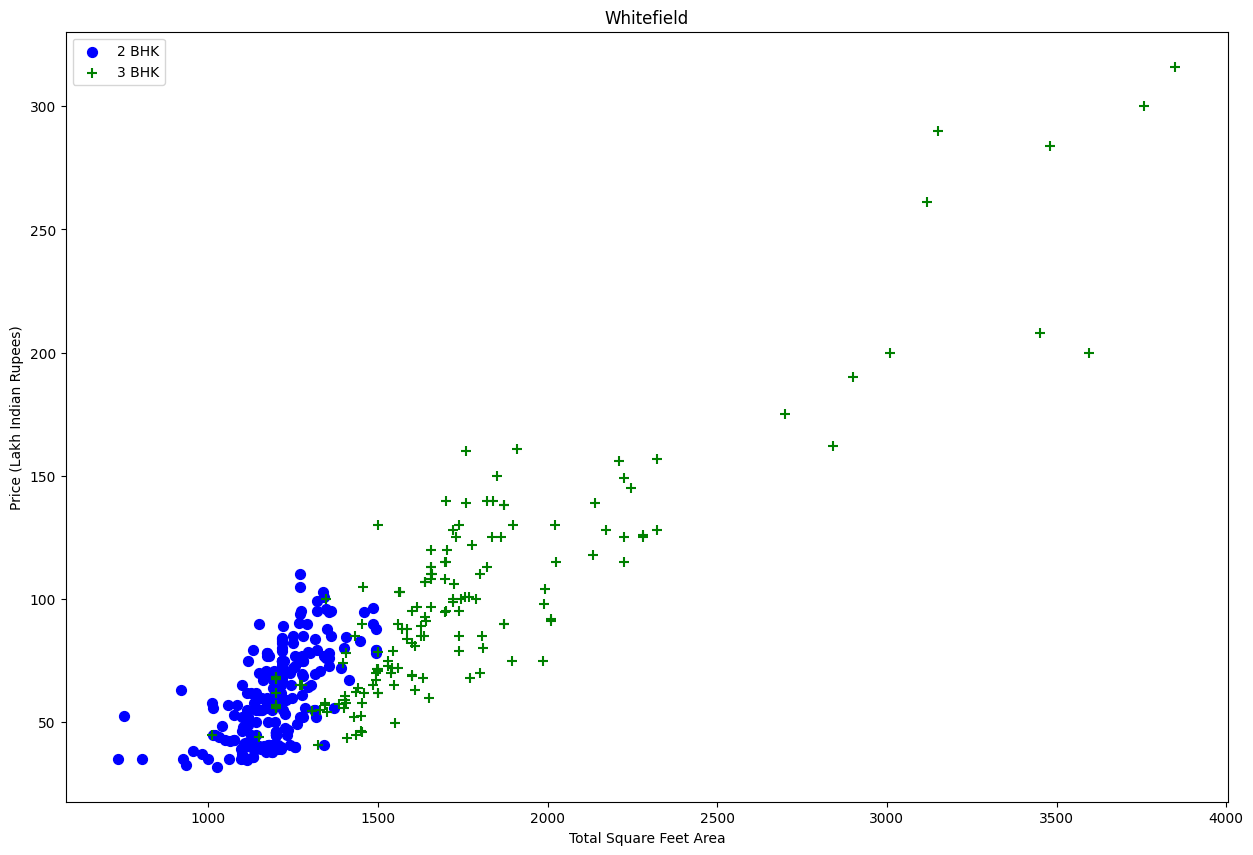

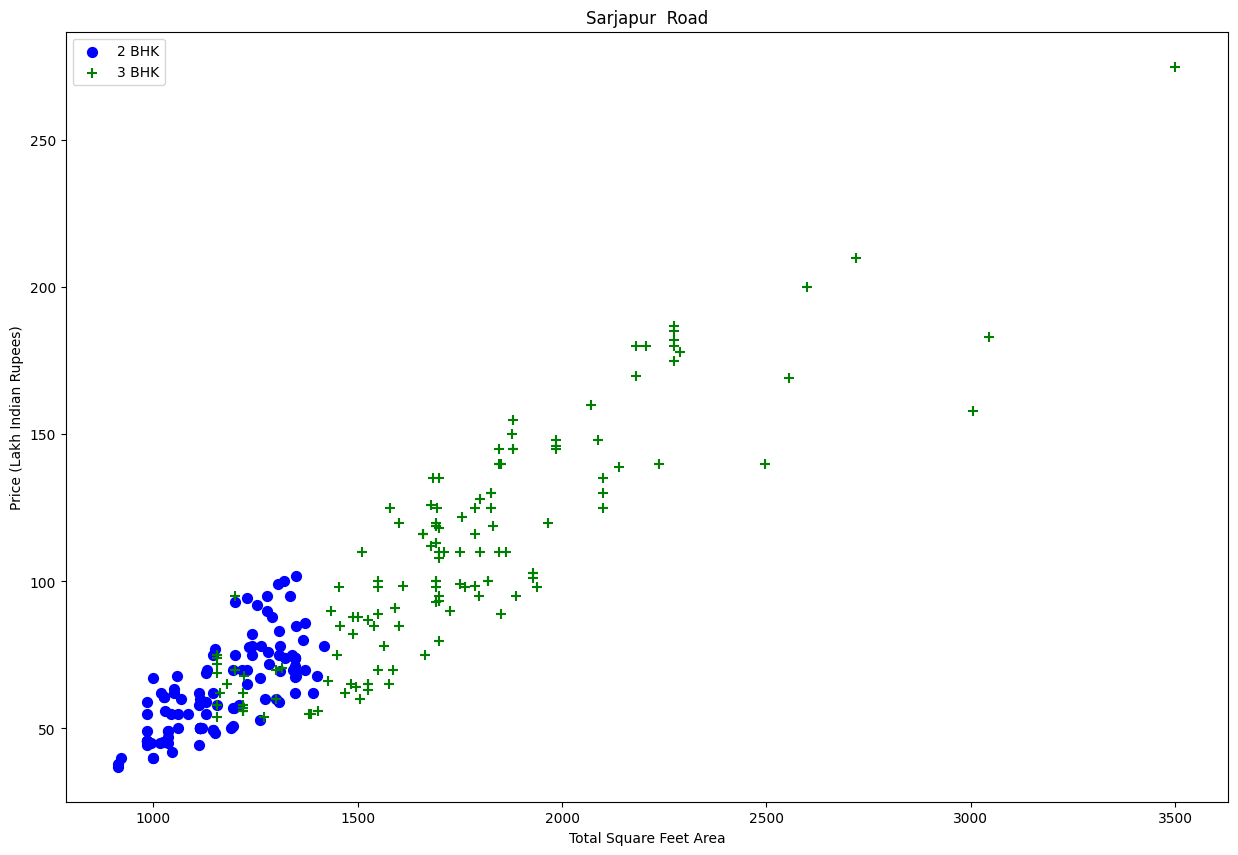

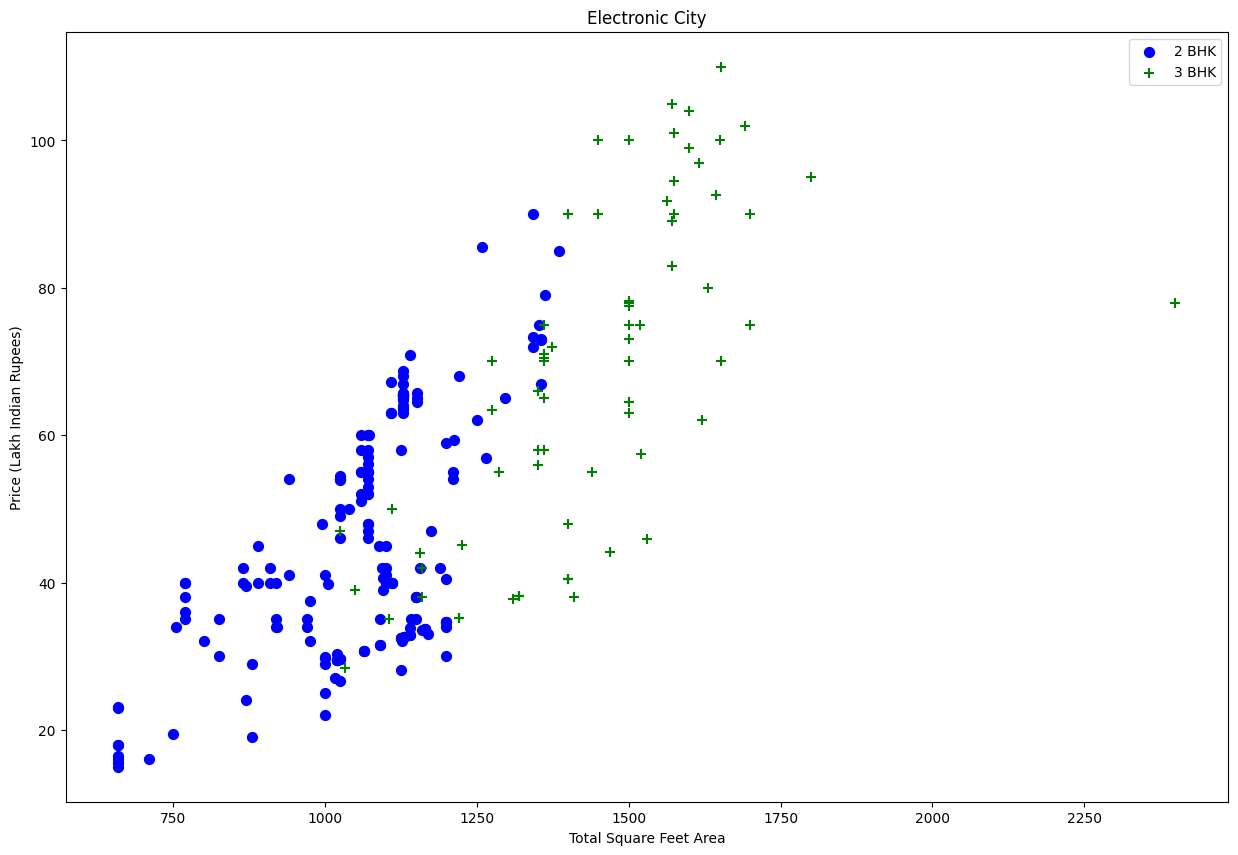

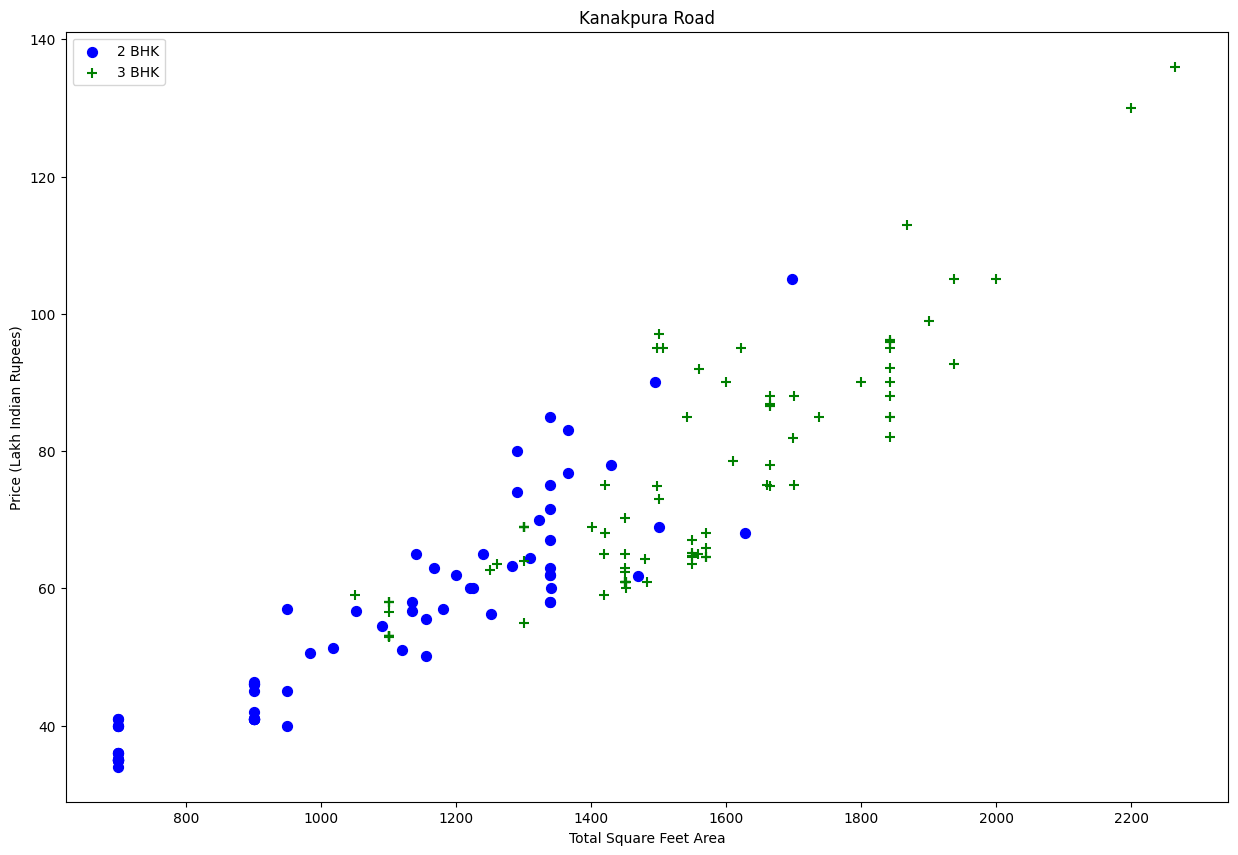

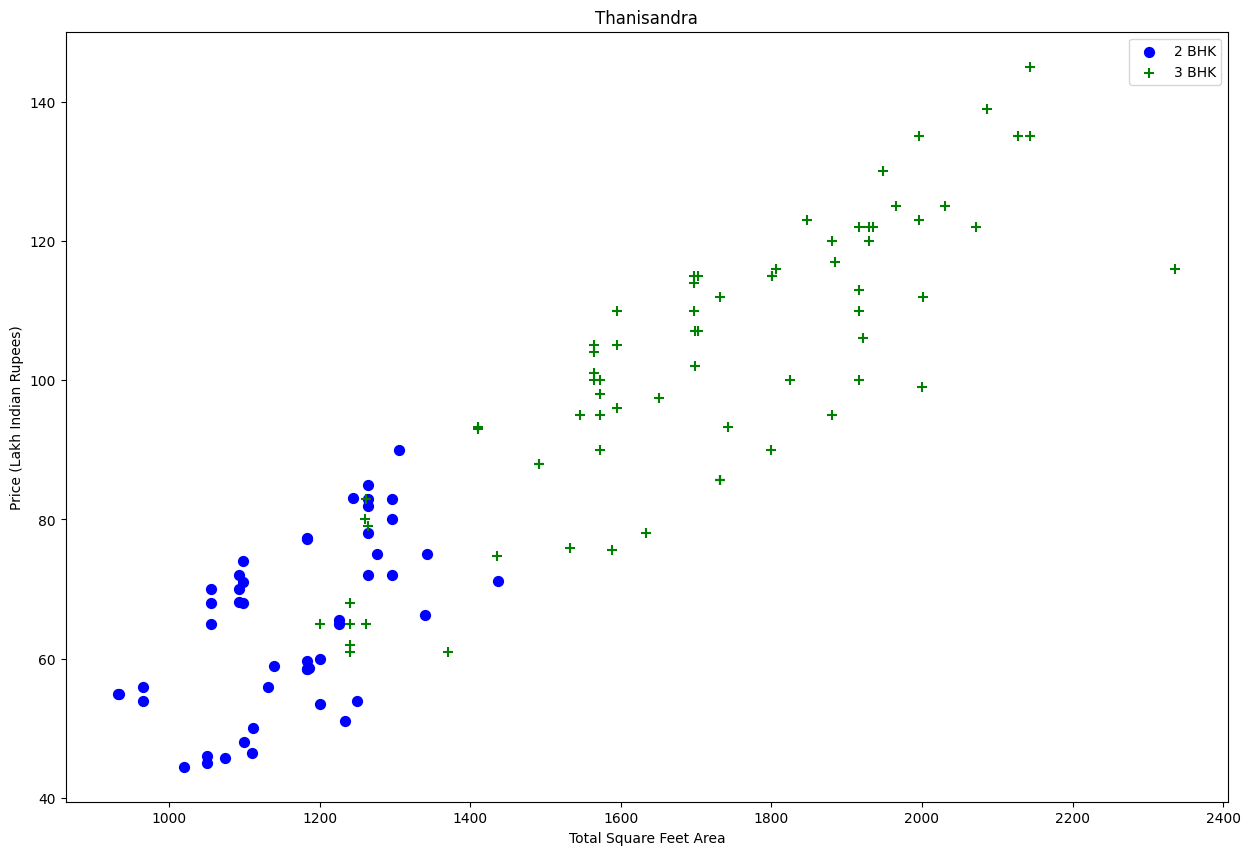

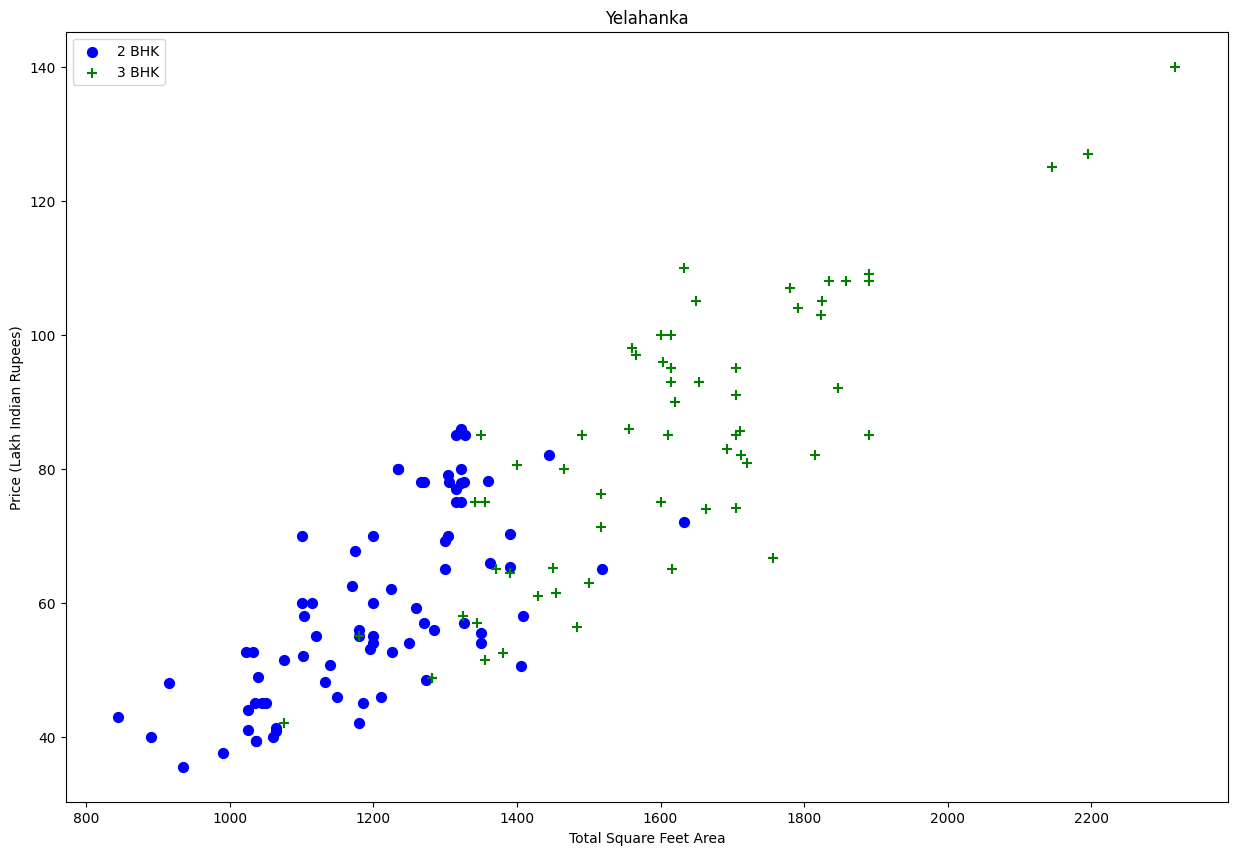

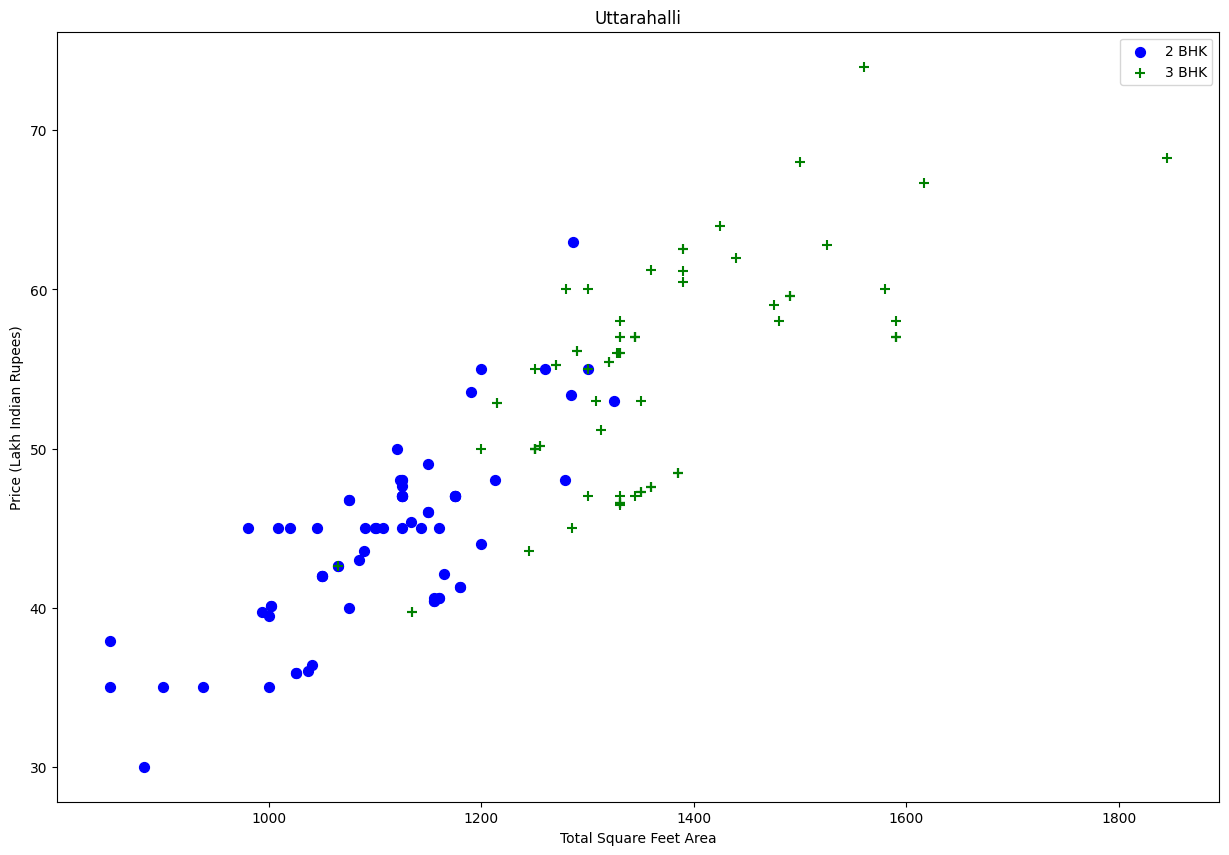

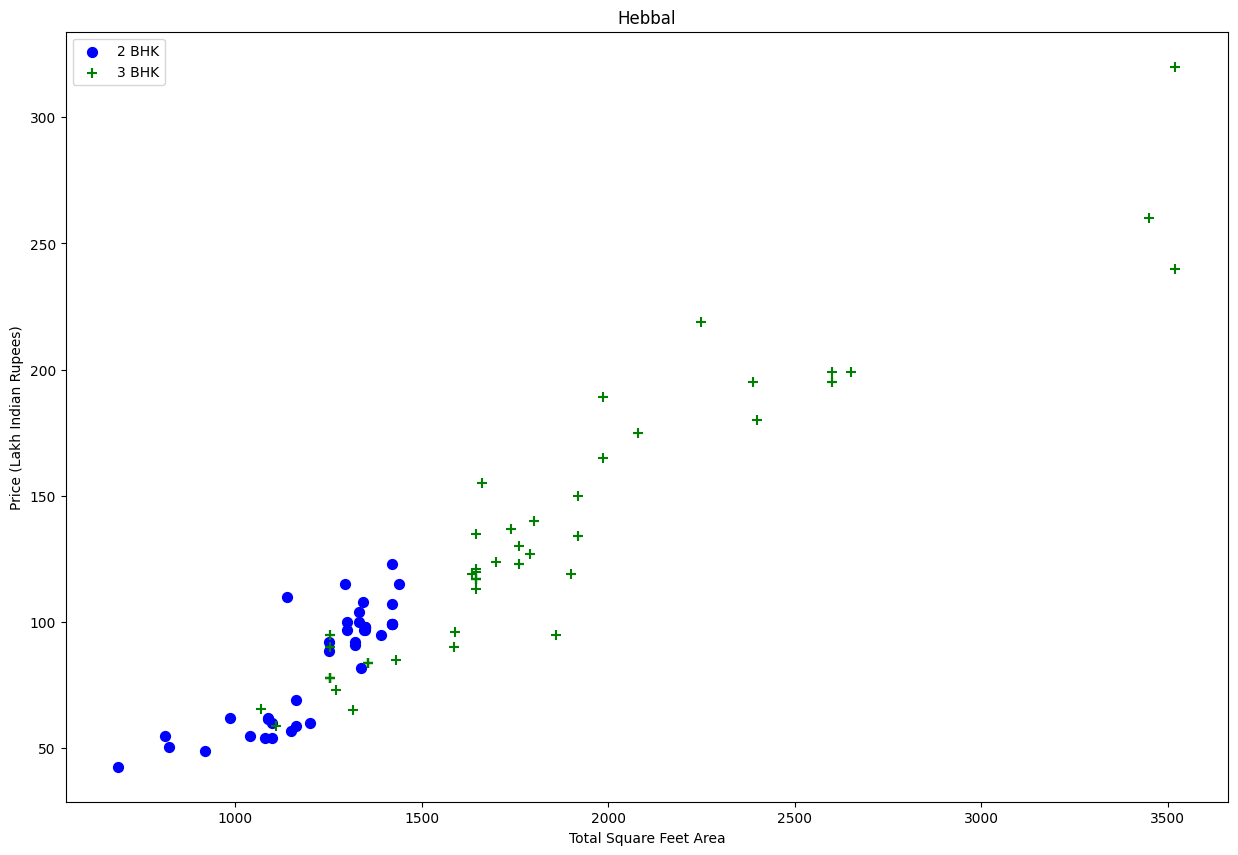

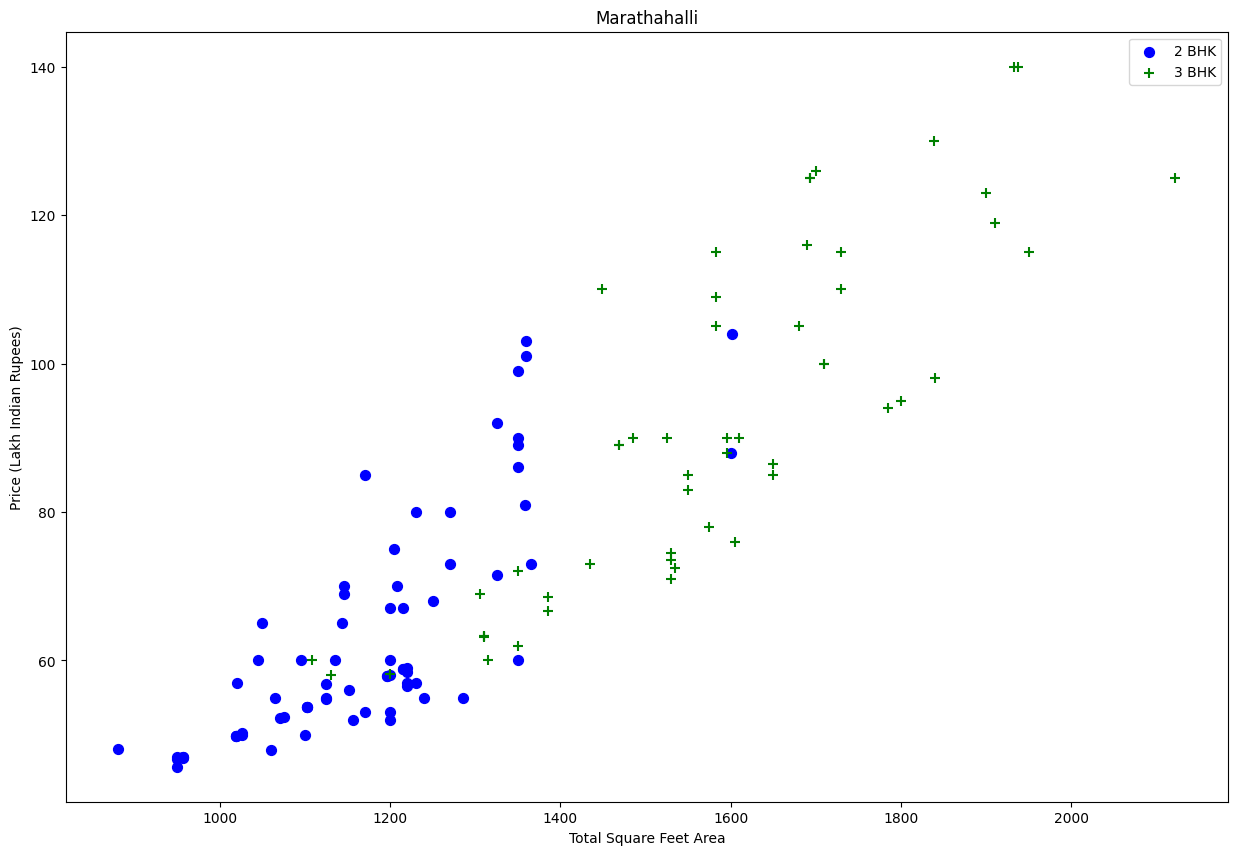

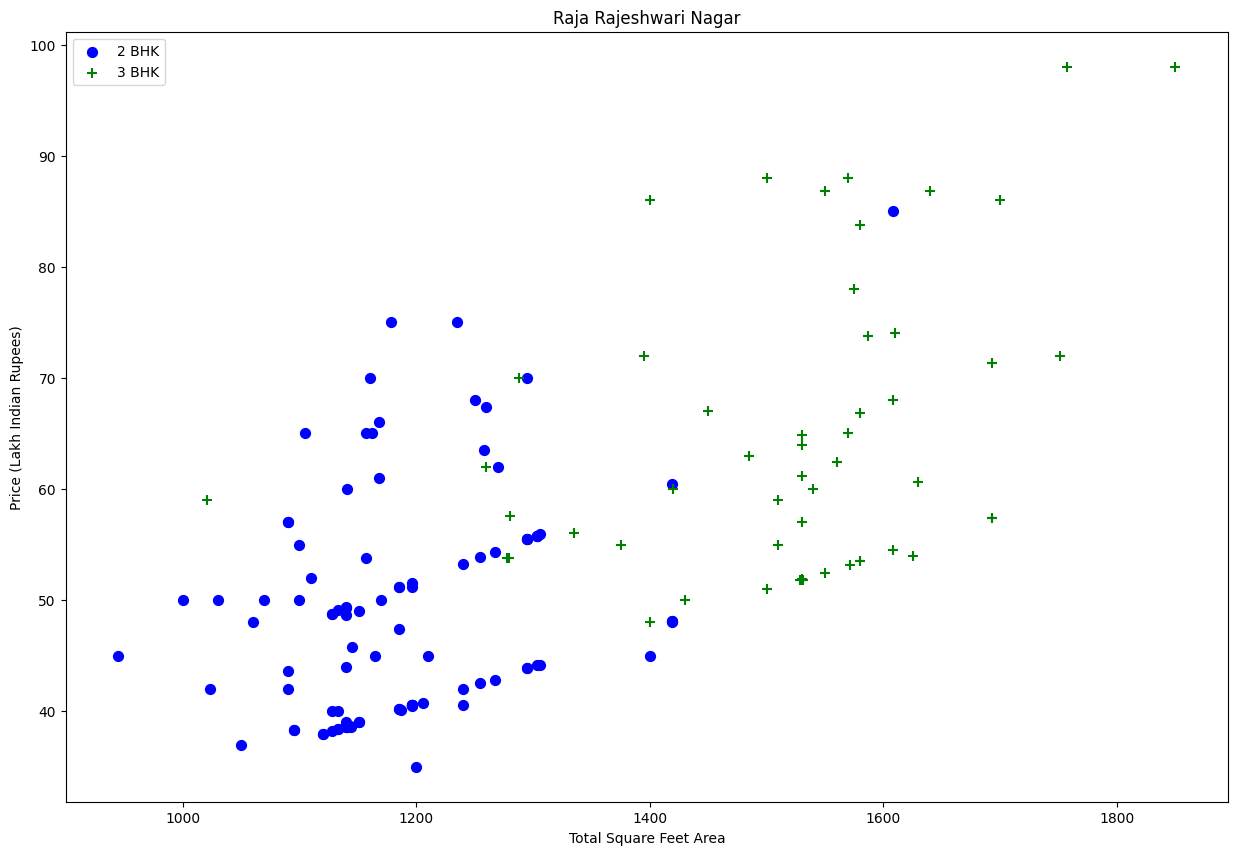

In [ ]:
for i in location_count.index[0:10]:
    (plot_scatter_chart(data_6,i))

In [ ]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_Sqft),
                'std': np.std(bhk_df.Price_Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_Sqft < (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis='index')


In [ ]:
data_7 = remove_bhk_outliers(data_6)

In [ ]:
data_7

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
1,1st Phase JP Nagar,1875.0,3,167.0,8906.666667,3
2,1st Phase JP Nagar,2065.0,4,210.0,10169.491525,3
4,1st Phase JP Nagar,2059.0,3,225.0,10927.634774,3
5,1st Phase JP Nagar,1394.0,2,100.0,7173.601148,2
6,1st Phase JP Nagar,1077.0,2,93.0,8635.097493,2
...,...,...,...,...,...,...
10121,other,1800.0,1,200.0,11111.111111,1
10127,other,1353.0,2,110.0,8130.081301,2
10128,other,812.0,1,26.0,3201.970443,1
10131,other,1200.0,2,140.0,11666.666667,2


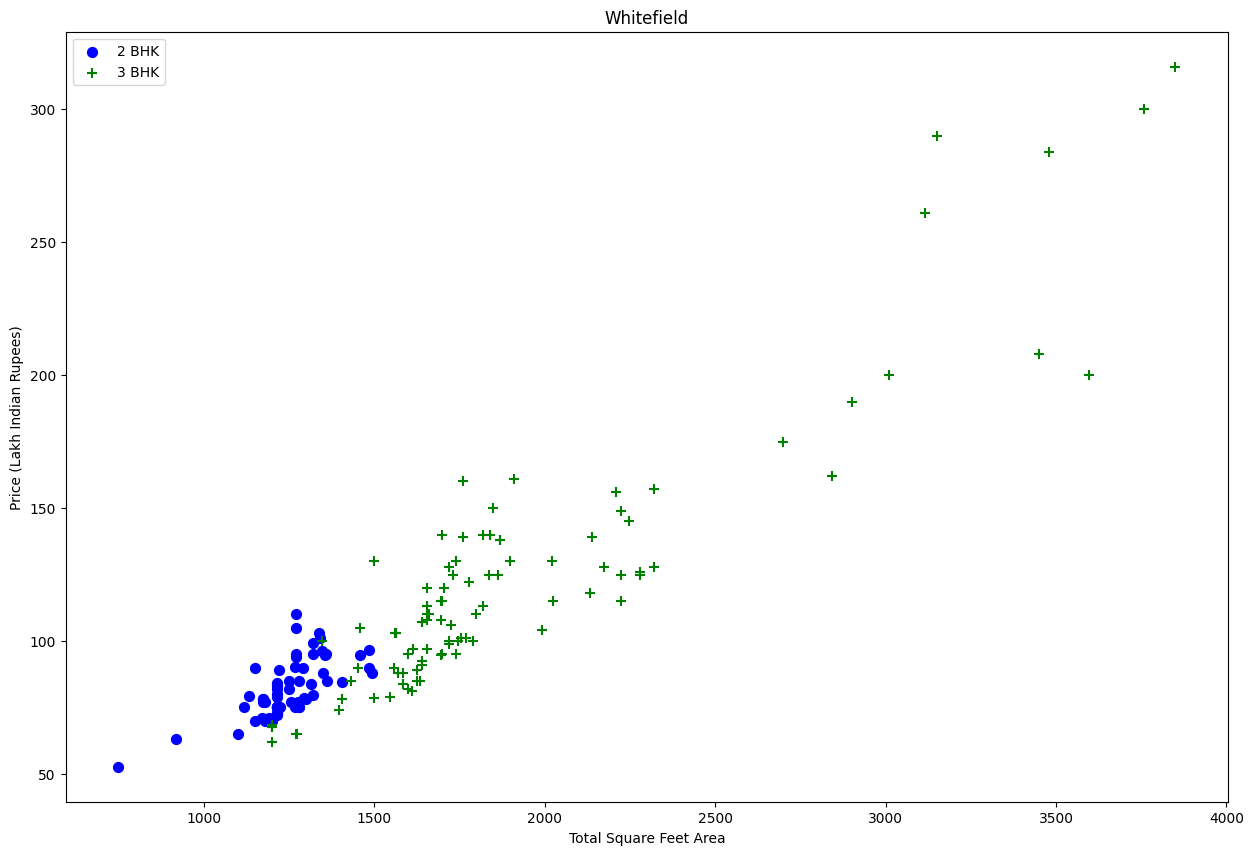

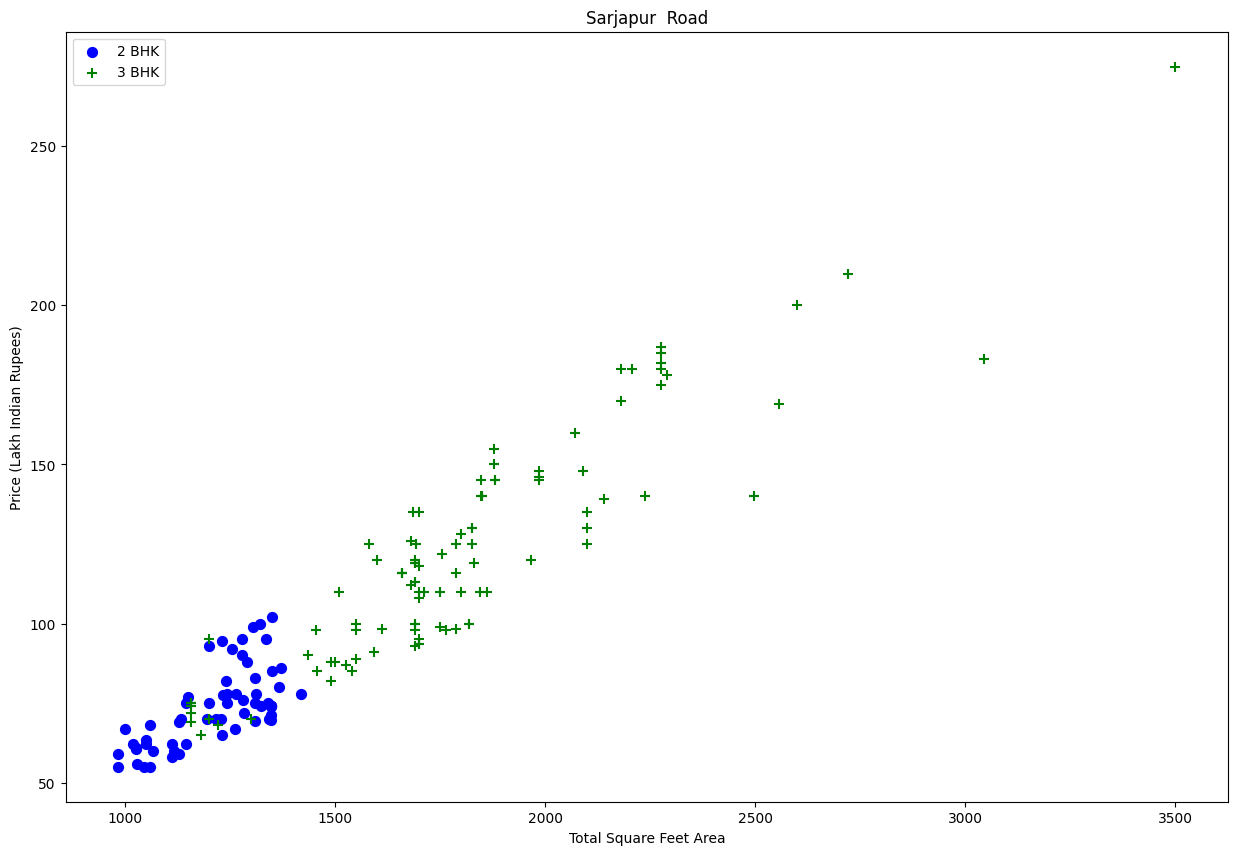

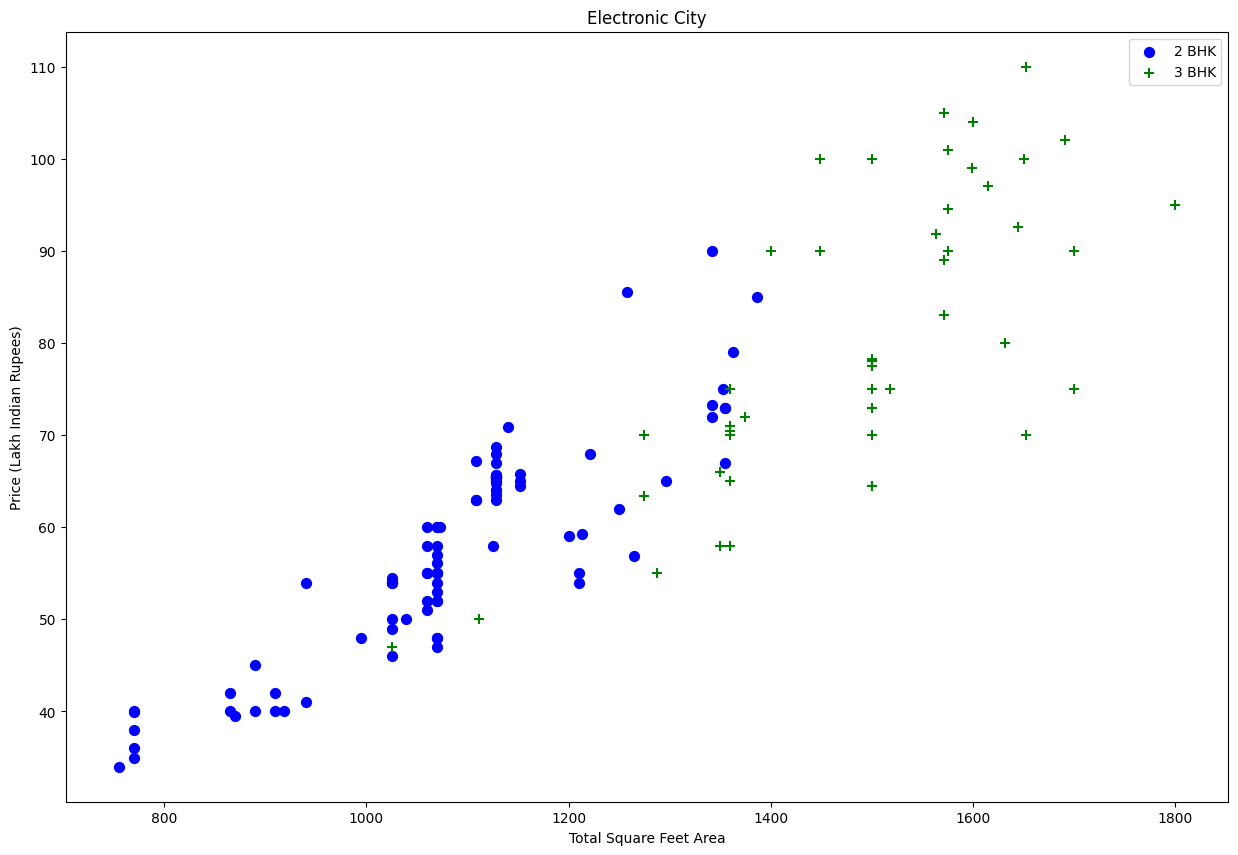

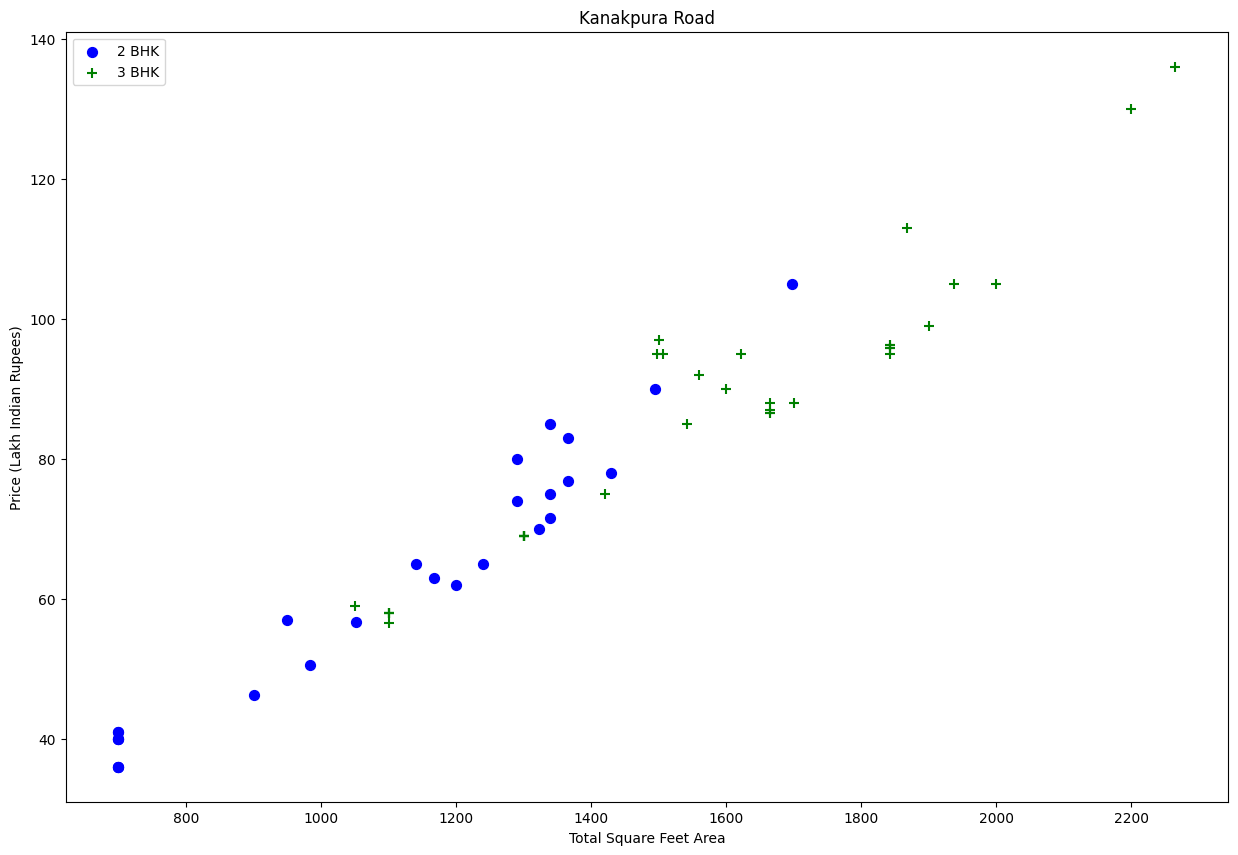

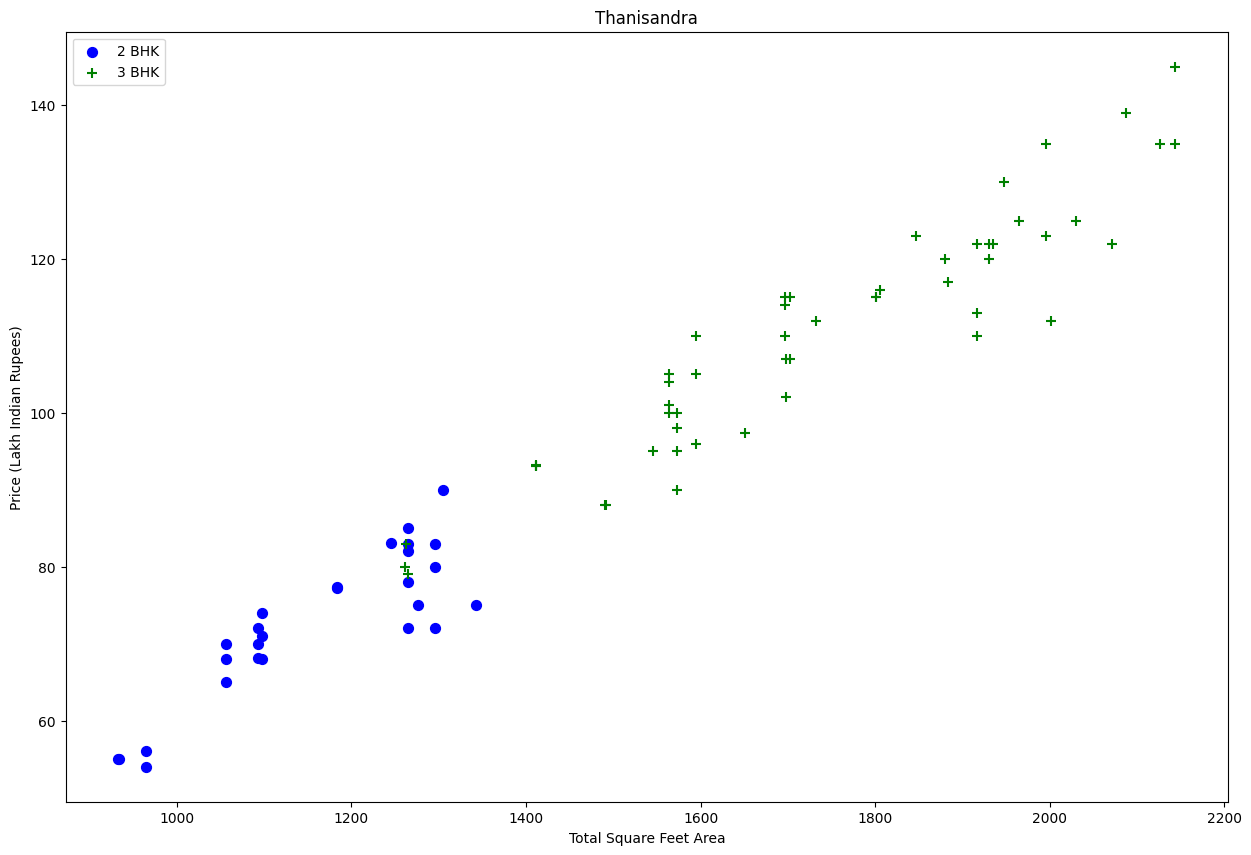

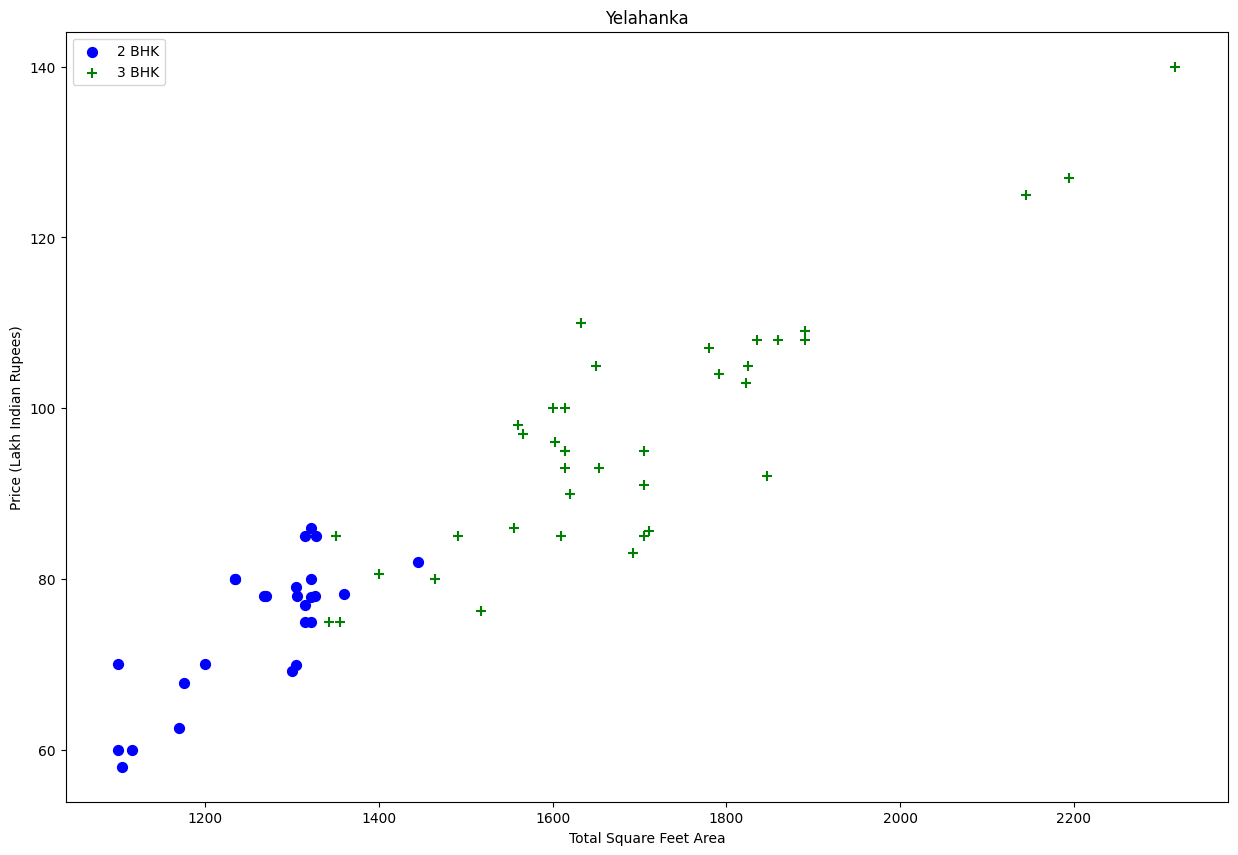

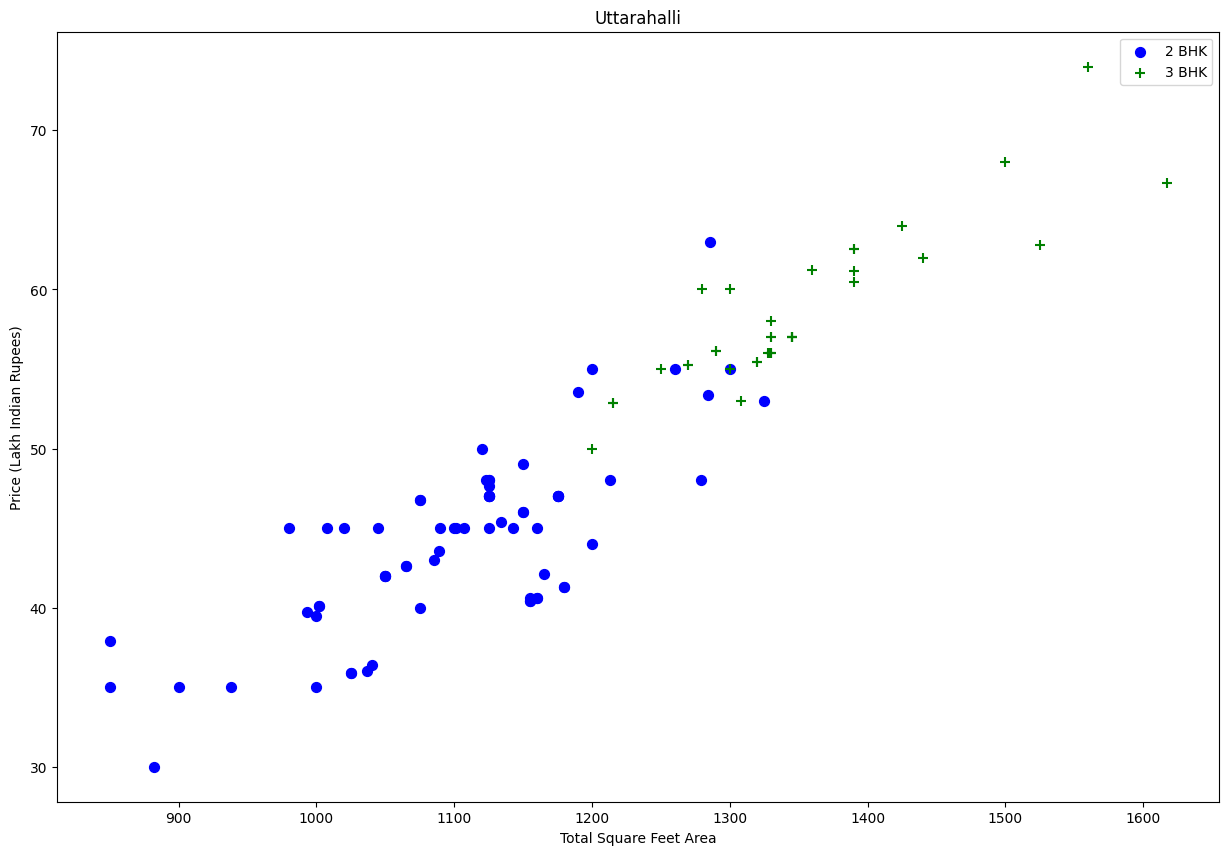

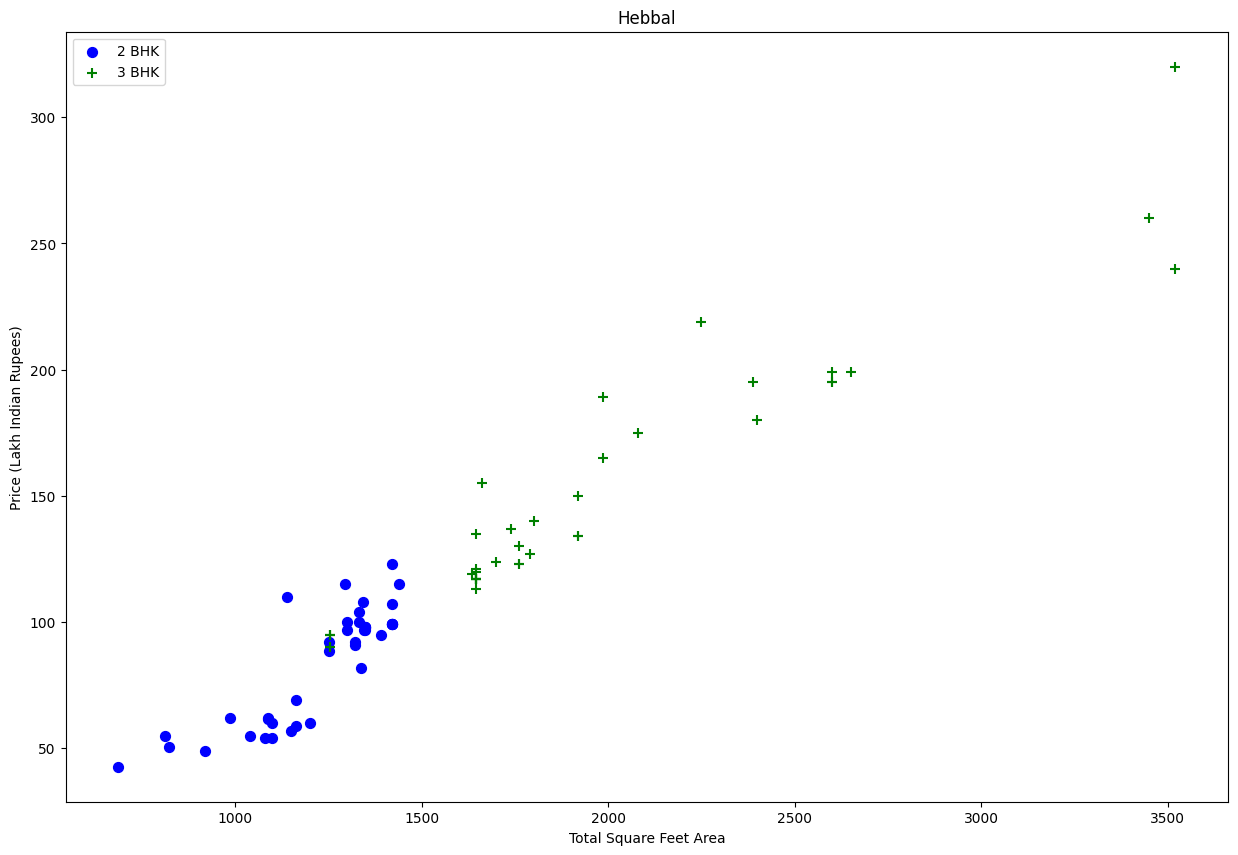

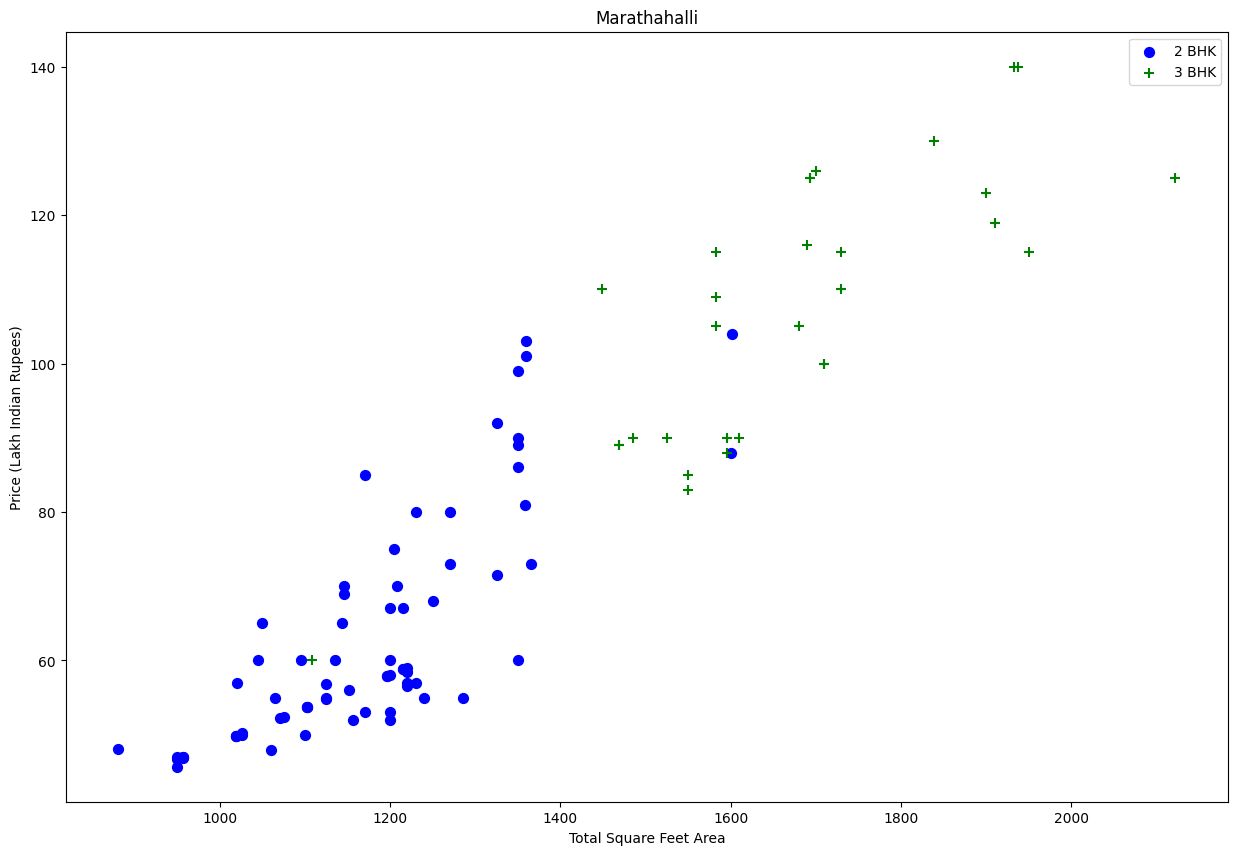

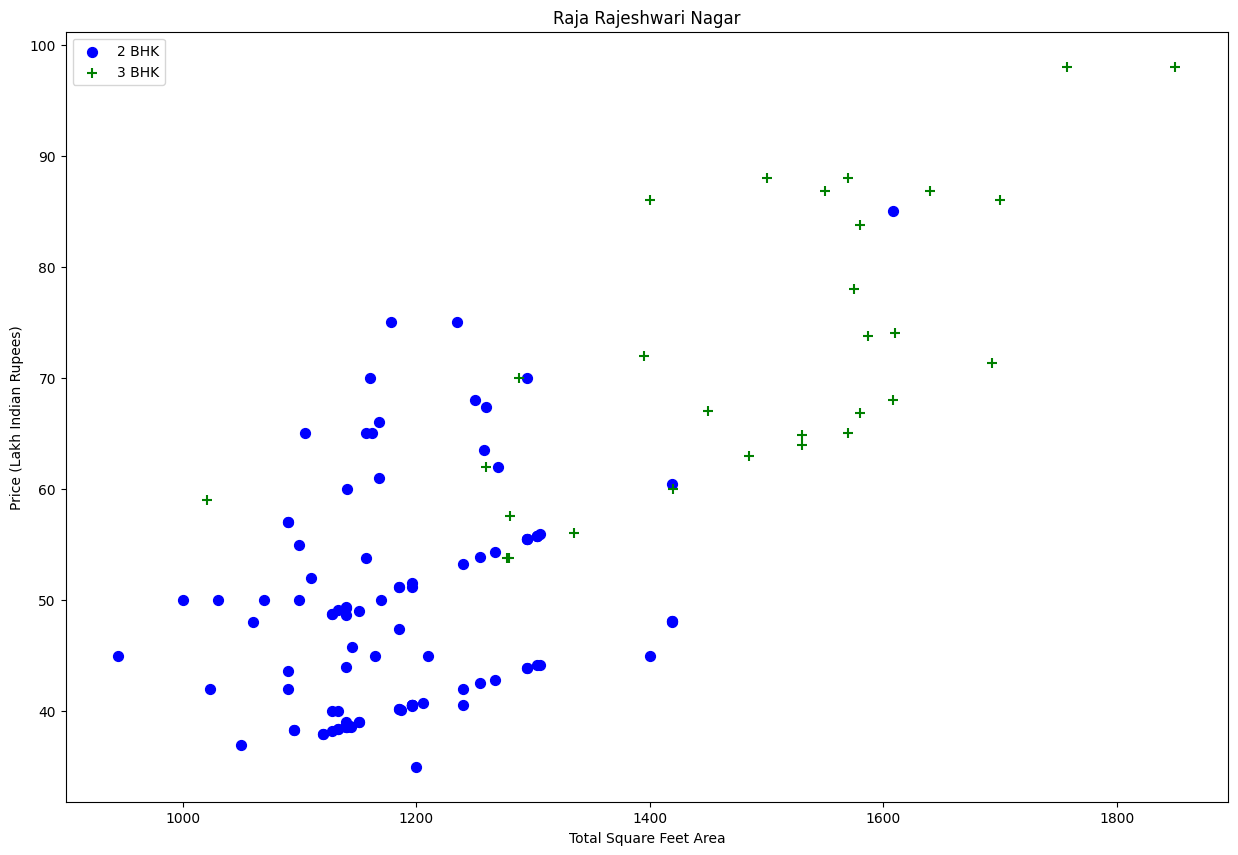

In [ ]:
for i in location_count.index[0:10]:
    (plot_scatter_chart(data_7,i))

Text(0, 0.5, 'Count')

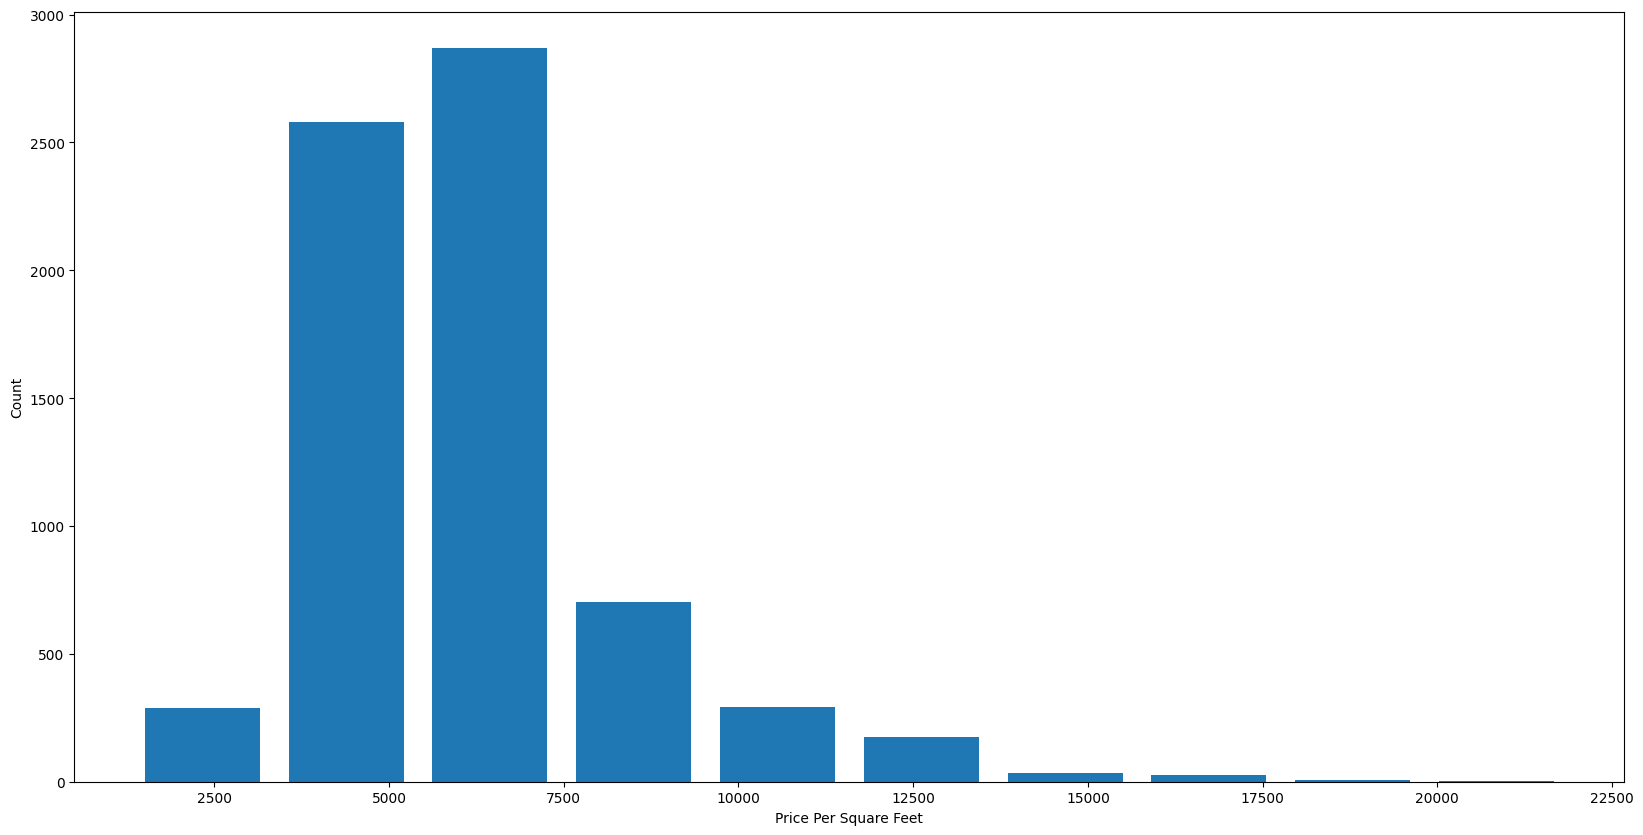

In [ ]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data_7.Price_Per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
data_7["bath"].unique()

array([ 3,  4,  2,  8,  5,  1,  6,  7,  9, 12, 16, 13])

In [ ]:
data_7[(data_7["bath"]>10)]

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
7977,other,12000.0,12,525.0,4375.000000,10
8090,other,10000.0,16,550.0,5500.000000,16
8986,other,6000.0,12,150.0,2500.000000,11
9127,other,4000.0,12,160.0,4000.000000,10
9411,other,5425.0,13,275.0,5069.124424,13


In [ ]:
data_7[(data_7["bath"]>data_7["bhk"]+2)]

,location,total_sqft,bath,price,Price_Per_Sqft,bhk
6132,Thanisandra,1806.0,6,116.0,6423.034330,3
7876,other,11338.0,9,1000.0,8819.897689,6
9718,other,7000.0,8,450.0,6428.571429,4


In [ ]:
data_8 = data_7[(data_7["bath"]<data_7["bhk"]+2)]

In [ ]:
data_8.shape

(6902, 6)

In [ ]:
semi_final_data = data_8.drop("Price_Per_Sqft",axis=1)

In [ ]:
semi_final_data

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3,167.0,3
2,1st Phase JP Nagar,2065.0,4,210.0,3
4,1st Phase JP Nagar,2059.0,3,225.0,3
5,1st Phase JP Nagar,1394.0,2,100.0,2
6,1st Phase JP Nagar,1077.0,2,93.0,2
...,...,...,...,...,...
10121,other,1800.0,1,200.0,1
10127,other,1353.0,2,110.0,2
10128,other,812.0,1,26.0,1
10131,other,1200.0,2,140.0,2


In [ ]:
final_data = pd.get_dummies(semi_final_data,columns=["location"],dtype=int)

In [ ]:
final_data.dtypes

total_sqft                     float64
bath                             int64
price                          float64
bhk                              int64
location_1st Phase JP Nagar      int64
                                ...   
location_Yelachenahalli          int64
location_Yelahanka               int64
location_Yelahanka New Town      int64
location_Yeshwanthpur            int64
location_other                   int64
Length: 185, dtype: object

In [ ]:
final_data.head()

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
1,1875.0,3,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2059.0,3,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1394.0,2,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1077.0,2,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_data.shape

(6902, 185)

In [ ]:
X = final_data.drop(["price"],axis=1)

In [ ]:
X.head()

,total_sqft,bath,bhk,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
1,1875.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2059.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1394.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1077.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = final_data["price"]

In [ ]:
Y.head()

1    167.0
2    210.0
4    225.0
5    100.0
6     93.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
len(X_train)

5521

In [ ]:
len(y_train)

5521

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8679002662189657

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.78779916, 0.8488516 , 0.76762288, 0.87331869, 0.77380896])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [ ]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.810280,{'fit_intercept': True}
1,lasso,0.734665,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.766205,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
# #,
#         "LogisticRegression" :{
#         "model":LogisticRegression(),
#         "params" : {
#              "C": [1.0,10.0]
#         }
#         }

In [ ]:
import pickle
with open('A_Real_Estate_price_Prediction_Project.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))